## Looking at historic climate patterns in Cedar Rapids, IA
I chose to look at Cedar Rapids, Iowa in the United States for this portfolio post. Located in east central Iowa, Cedar Rapids is the second largest city in the state, population-wise behind the capital, Des Moines. I grew up here (4th grade through high school) and went to college just down the road in Iowa City. I moved to Cedar Rapids in 1990 and lived in eastern Iowa until 2020. 

For this analysis I'll be using data from the NOAA NCEI Climate Data Online network (network ID: [GHCND:USC00131319](https://www.ncei.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00131319/detail)). This station has been in service since 1892 and has good coverage (99%). It has been relocated since originally coming online and is now currently located in what is technically Marion, IA a suburb of Cedar Rapids.

![](https://github.com/nquarder/nquarder.github.io/blob/main/img/cr-ncei-station-info.png?raw=true)

In [15]:
# Import python libraries
import pandas as pd
import holoviews as hv
import hvplot.pandas
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

In [3]:
# Generate API endpoint request for Cedar Rapids, IA (station id: USC00131319)
cr_url = ('https://www.ncei.noaa.gov/access/services/data/v1?'
            'dataset=daily-summaries'
            '&dataTypes=TOBS,PRCP'
            '&stations=USC00131319'
            '&startDate=1892-01-01'
            '&endDate=2024-04-16'
            '&includeStationName=true'
            '&includeStationLocation=1'
            '&units=standard')
cr_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TOBS,PRCP&stations=USC00131319&startDate=1892-01-01&endDate=2024-04-16&includeStationName=true&includeStationLocation=1&units=standard'

In [4]:
# Open data using pandas
cr_df = pd.read_csv(cr_url,
                    index_col='DATE',
                    na_values=['NaN'],
                    parse_dates=True)
cr_df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,TOBS
DATE,,,,,,,
1892-01-01,USC00131319,"CEDAR RAPIDS NUMBER 1, IA US",42.0496,-91.5881,247.8,1.68,NaN
1892-01-02,USC00131319,"CEDAR RAPIDS NUMBER 1, IA US",42.0496,-91.5881,247.8,0.67,NaN
1892-01-03,USC00131319,"CEDAR RAPIDS NUMBER 1, IA US",42.0496,-91.5881,247.8,0.00,NaN
1892-01-04,USC00131319,"CEDAR RAPIDS NUMBER 1, IA US",42.0496,-91.5881,247.8,0.00,NaN
1892-01-05,USC00131319,"CEDAR RAPIDS NUMBER 1, IA US",42.0496,-91.5881,247.8,0.00,NaN
...,...,...,...,...,...,...,...
2024-04-12,USC00131319,"CEDAR RAPIDS NUMBER 1, IA US",42.0496,-91.5881,247.8,0.00,63.0
2024-04-13,USC00131319,"CEDAR RAPIDS NUMBER 1, IA US",42.0496,-91.5881,247.8,0.00,78.0
2024-04-14,USC00131319,"CEDAR RAPIDS NUMBER 1, IA US",42.0496,-91.5881,247.8,0.00,84.0


In [5]:
# Clean up the data (drop columns that don't vary with time)
cr_df = cr_df[['TOBS','PRCP']]
cr_df

,TOBS,PRCP
DATE,,
1892-01-01,NaN,1.68
1892-01-02,NaN,0.67
1892-01-03,NaN,0.00
1892-01-04,NaN,0.00
1892-01-05,NaN,0.00
...,...,...
2024-04-12,63.0,0.00
2024-04-13,78.0,0.00
2024-04-14,84.0,0.00


<Axes: xlabel='DATE'>

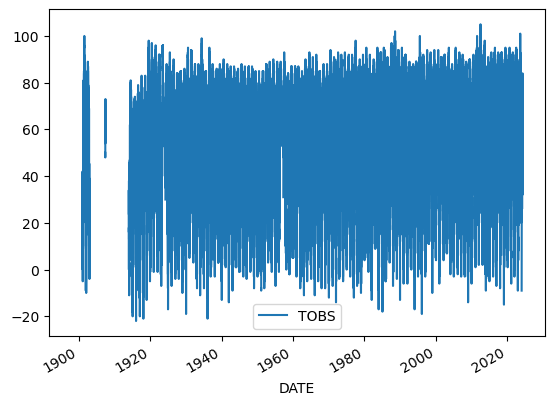

In [6]:
# Plot the raw temperature data (TOBS)
cr_df.plot(y='TOBS')

In [7]:
# Subset the data (1920-2020)
cr_1920_2020 = cr_df["1920":"2020"]
cr_1920_2020

,TOBS,PRCP
DATE,,
1920-01-01,2.0,0.00
1920-01-02,-1.0,0.00
1920-01-03,9.0,0.00
1920-01-04,4.0,0.00
1920-01-05,25.0,0.00
...,...,...
2020-12-27,27.0,0.08
2020-12-28,22.0,0.00
2020-12-29,25.0,0.55


In [9]:
# Resample the data to calculate annual mean
cr_annual_mean = cr_1920_2020.resample('YE').mean()
cr_annual_mean

,TOBS,PRCP
DATE,,
1920-12-31,52.401639,0.057240
1921-12-31,56.302198,0.074466
1922-12-31,54.463014,0.074027
1923-12-31,50.188679,0.091575
1924-12-31,52.850365,0.113382
...,...,...
2016-12-31,57.945355,0.117760
2017-12-31,57.249315,0.096055
2018-12-31,54.768802,0.129860


In [10]:
# Calculate temperature in Celsius and add new column
cr_annual_mean['TCel'] = (cr_annual_mean['TOBS'] - 32) * 5/9
cr_annual_mean

,TOBS,PRCP,TCel
DATE,,,
1920-12-31,52.401639,0.057240,11.334244
1921-12-31,56.302198,0.074466,13.501221
1922-12-31,54.463014,0.074027,12.479452
1923-12-31,50.188679,0.091575,10.104822
1924-12-31,52.850365,0.113382,11.583536
...,...,...,...
2016-12-31,57.945355,0.117760,14.414086
2017-12-31,57.249315,0.096055,14.027397
2018-12-31,54.768802,0.129860,12.649335


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
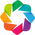

:Curve   [DATE]   (TOBS)

In [33]:
# Load bokeh extension for interactive plots
hv.extension('bokeh')
cr_annual_mean.hvplot(y='TOBS')

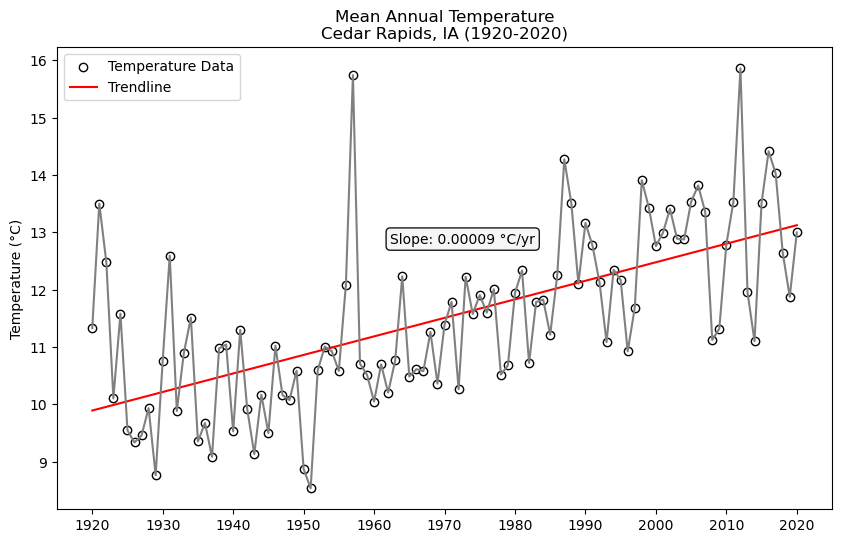

In [30]:
# Plot using matplotlib and include trendline (w help from ChatGPT)

# Define figure and axis objects, specify figure size
fig, ax = plt.subplots(figsize=(10,6))

# Clean out missing values (for calculating trendline)
cr_yearly_mean_clean = cr_annual_mean.dropna()

# Define x_values using matplotlib mdates
x_values = mdates.date2num(cr_yearly_mean_clean.index)

# Plot the TCel data as a scatter plot
ax.scatter(x_values,
           cr_yearly_mean_clean["TCel"],
           label="Temperature Data",
           color='white',
           edgecolor='black')

# Fit a linear regression model (from ChatGPT)
slope, intercept = np.polyfit(x_values, cr_yearly_mean_clean["TCel"], 1)
trendline = slope * x_values + intercept

# Plot trendline and TCel data as line (connecting points in scatter plot)
ax.plot(x_values, trendline, color='red', label="Trendline")
ax.plot(x_values, cr_annual_mean["TCel"], color='grey', markersize=0.3)

# Formatting x-axis as dates
# Set x-axis ticks manually to start from 1920 (from ChatGPT)
start_date = pd.to_datetime('1920-01-01')
end_date = pd.to_datetime('2020-12-31')
ax.set_xticks(pd.date_range(start_date, end_date, freq='10YE'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add text box with slope value (From ChatGPT)
slope_text = f"Slope: {slope:.5f} °C/yr"
ax.text(0.43, 0.6, slope_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='whitesmoke', alpha=0.9))

ax.set(title="Mean Annual Temperature\nCedar Rapids, IA (1920-2020)",
       ylabel="Temperature (°C)")

ax.legend()  # Add legend to display labels

plt.show()

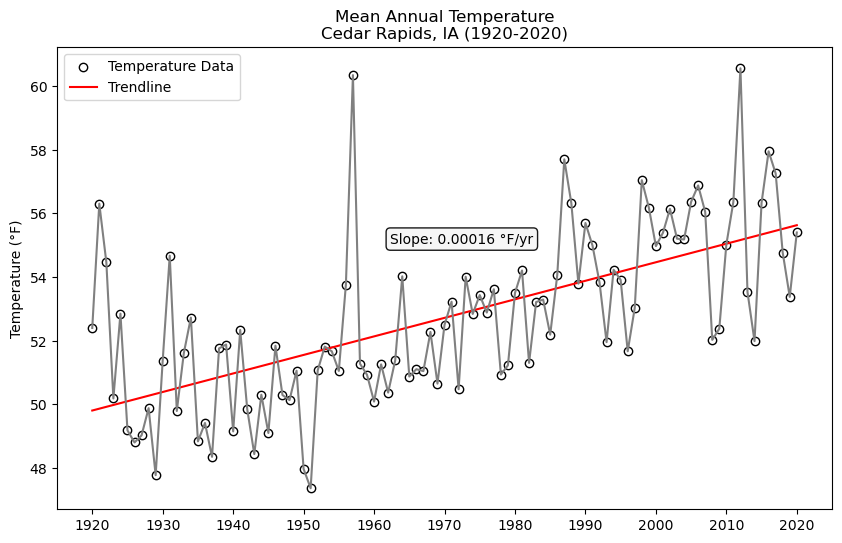

In [34]:
# Plot using matplotlib and include trendline (w help from ChatGPT)
# Repeat for TOBS (Fahrenheit)

# Define figure and axis objects, specify figure size
fig, ax = plt.subplots(figsize=(10,6))

# Clean out missing values (for calculating trendline)
cr_yearly_mean_clean = cr_annual_mean.dropna()

# Define x_values using matplotlib mdates
x_values = mdates.date2num(cr_yearly_mean_clean.index)

# Plot the TCel data as a scatter plot
ax.scatter(x_values,
           cr_yearly_mean_clean["TOBS"],
           label="Temperature Data",
           color='white',
           edgecolor='black')

# Fit a linear regression model (from ChatGPT)
slope, intercept = np.polyfit(x_values, cr_yearly_mean_clean["TOBS"], 1)
trendline = slope * x_values + intercept

# Plot trendline and TCel data as line (connecting points in scatter plot)
ax.plot(x_values, trendline, color='red', label="Trendline")
ax.plot(x_values, cr_annual_mean["TOBS"], color='grey', markersize=0.3)

# Formatting x-axis as dates
# Set x-axis ticks manually to start from 1920 (from ChatGPT)
start_date = pd.to_datetime('1920-01-01')
end_date = pd.to_datetime('2020-12-31')
ax.set_xticks(pd.date_range(start_date, end_date, freq='10YE'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add text box with slope value (From ChatGPT)
slope_text = f"Slope: {slope:.5f} °F/yr"
ax.text(0.43, 0.6, slope_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='whitesmoke', alpha=0.9))

ax.set(title="Mean Annual Temperature\nCedar Rapids, IA (1920-2020)",
       ylabel="Temperature (°F)")

ax.legend()  # Add legend to display labels

plt.show()

## Cedar Rapids is slowly getting warmer
Between 1920 and 2020, the averge annual temperature in Cedar Rapids, IA increased at a rate of 0.00009 °C/yr; 0.009 °C/century [0.00016 °F/yr; 0.016 °F/century]. During this time period 1957 and 2012 had the highest average observed temperatures at nearly 16 °C (~60 °F).

In [1]:
%%capture
%%bash
jupyter nbconvert *.ipynb --to html